# Multivariate Analysis

This will demonstrate how to perform multivariate analysis on a dataset.

## Import libraries and load data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import parallel_coordinates

print(pd.__version__)
print(np.__version__)

2.1.1
1.26.1


In [4]:
# Loading data
data = pd.read_csv('datasets/churn_prediction.csv')

# Printing the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
# Shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (28382, 21)
Columns: Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')


## Pivot Table

We are using pivot table to comply with the objective of identifying the churning customers profile using multiple categorical features.

In [6]:
# Gender, Occupation, Customer Net worth category with Churn
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc = 'sum')

customer_nw_category    1    2    3
gender occupation                  
Female company          1    0    2
       retired         12   23   17
       salaried        51  128  124
       self_employed  211  761  512
       student         18   79   43
Male   company          0    0    0
       retired         32  120  101
       salaried        92  395  357
       self_employed  237  942  700
       student         28   95   61

In [8]:
# Gender, Occupation, Customer Net worth category with Churn percentage
(data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100).round(2)

customer_nw_category       1      2      3
gender occupation                         
Female company        100.00   0.00  66.67
       retired         20.69  11.22  13.49
       salaried        18.55  14.85  17.69
       self_employed   18.11  18.20  18.92
       student         10.40  14.44  15.03
Male   company          0.00   0.00   0.00
       retired         18.50  14.25  16.32
       salaried        17.56  16.41  18.47
       self_employed   22.83  20.42  21.47
       student         16.97  17.21  18.21

**Inferences Drawn:**
- __Highest number of churning customers__ are those __male customers__ who lie in __2 net worth category__ and belong to __self-employed__ profession.
- Proportion wise for net worth category 1, approximately 22% __male customers__ who belong to the __self-employed__ profession are churning.
- Proportion wise for net worth category 2, 20% __male customers__ who belong to the __self-employed__ profession are churning.
- For net worth category 3, approximately 21% __male customers__ who belong to the __self-employed__ profession are churning.

In [9]:
# Gender, Age, Occupation with Churning Status
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc = 'sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [10]:
age = pd.cut(data['age'], [0, 25, 50, 100])
(data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100).round(2)

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]        NaN      NaN     15.91          21.77    13.42
       (25, 50]      50.0     0.00     16.10          19.16    15.51
       (50, 100]     50.0    13.54     17.95          17.37     0.00
Male   (0, 25]        0.0      NaN     20.99          30.33    16.55
       (25, 50]       0.0    14.29     17.35          21.89    21.08
       (50, 100]      0.0    15.49     17.17          19.34     0.00

**Inferences Drawn:**

- We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100.
- Highest number of Customers are churning from __male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__.
- Highest Proportion of Customers are churning from __male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__.

In [11]:
# Gender, Age, Occupation and Current Balance with Churning Status
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [12]:
balance = pd.qcut(data['current_balance'], 3)
(data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100).round(2)

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                     NaN     NaN    26.32         38.60   21.26   
       (25, 50]                   50.0    0.00    32.30         33.68   25.97   
       (50, 100]                 100.0   28.33    35.16         30.64    0.00   
Male   (0, 25]                     0.0     NaN    35.29         52.00   28.19   
       (25, 50]                    0.0    0.00    33.37         38.90   44.12   
       (50, 100]                   0.0   29.49    32.12         33.06     NaN   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                    NaN     NaN     5.88         10.81    7.17   
       (25, 50]                 100.0    0.00     9.83         10.89    6.86   
       (50, 100]                  NaN    5.63    11.20         11.05     NaN   
Male   (0, 25]                    NaN     NaN    14.29         14.12    6.49   
       (25, 50]                   0.0   16.67    11.89         13.21   12.35   
       (50, 100]                  0.0    6.93    10.77         12.57     NaN   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                      NaN     NaN    12.50          3.33   10.24  
       (25, 50]                     0.0     NaN     6.70         11.99   16.67  
       (50, 100]                    0.0    8.20     8.03         10.58     NaN  
Male   (0, 25]                      NaN     NaN     5.26         16.95   12.02  
       (25, 50]                     0.0   20.00     9.01         12.06    9.46  
       (50, 100]                    0.0   10.61    10.54         13.94    0.00

**Inferences Drawn:**
- Current balance is divided into 3 quantiles.
- It is visible at first look that for __low current balance__ more number of customers are churning.
- For the first quantile of current balance, more than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%.
- In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __young Self employed Customers__ are more prone to churn.
- There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __young male self employed customers__ are churning more than young female self employed customers.

## Box Plot

Now in order to comply with our objective of identifying churning customers profile we will use grouped boxplot.

In [13]:
def grouped_box_plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x = cat1, y = cont, hue = cat2, data = data, orient='v')
    plt.title('Boxplot')

### age, occupation and churn

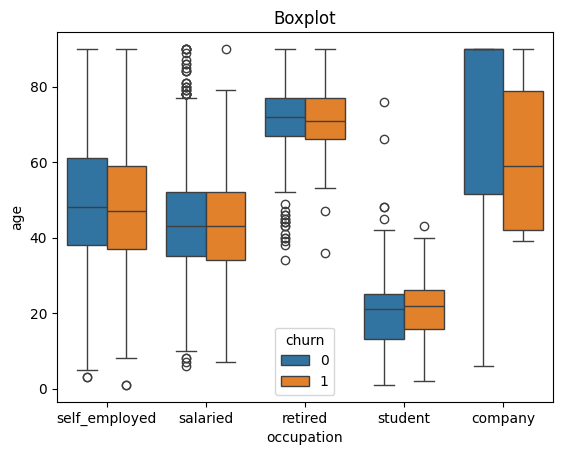

In [14]:
# A grouped box plot for age, occupation and churn
grouped_box_plot(data,'age', 'occupation', 'churn')

**Inferences Drawn:**
- For __self-employed__ profession churning customers are slightly __younger__ than non churning customers.
- In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__.


### vintage, gender and churn

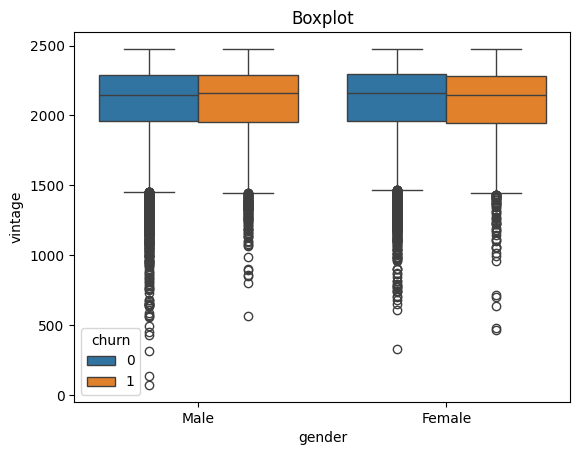

In [15]:
# A grouped box plot for vintage, gender and churn
grouped_box_plot(data,'vintage','gender', 'churn')

**Inferences Drawn:**

There is __no visible difference__ in the vintage feature for genderwise churning and non churning customers.

## Pair Plot

### churn vs current & previous month balances

In [16]:
# Create a pair plot
balance_cols = ['current_balance','previous_month_end_balance', 'current_month_balance', 'previous_month_balance']
balance_data = pd.DataFrame()

for i in balance_cols:
    balance_data[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = balance_data.columns
balance_data['churn'] = data['churn']

- We will use the **`pairplot`** function which supports displaying relationship between multiple variables.
- It displays the scatter plot between a pair of feature and also displays the distribution.

Here, log of current balance & previous month end balance, and log of average monthly balance of current and previous month are taken.

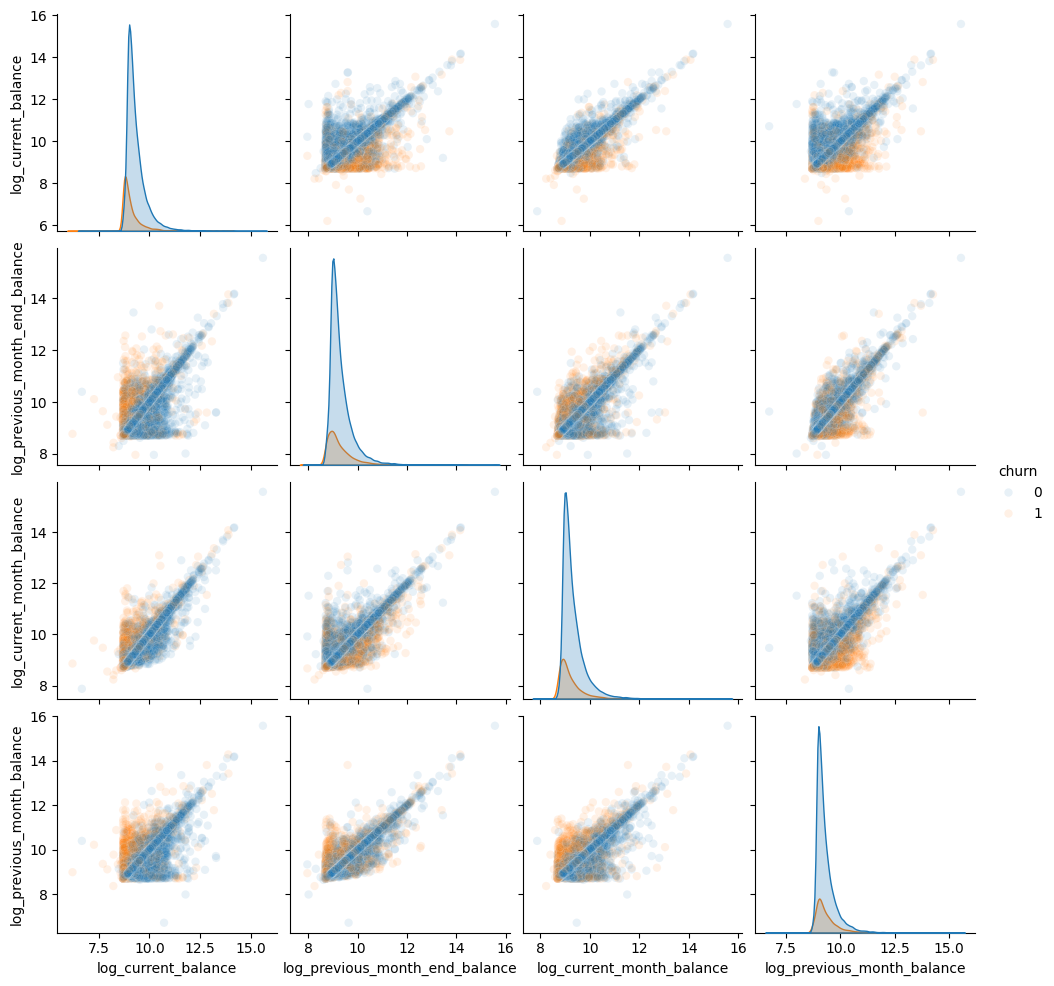

In [17]:
# Creating a pair plot
sns.pairplot(balance_data,vars = log_balance_cols, hue ='churn', plot_kws={'alpha':0.1})
plt.show()

- There is high correlation between the previous and current month balances which is expected.
- The distribution for churn and not churn is slightly different for both the cases.

### churn vs credits and debits for current and previous months

In [19]:
credit_debit_cols = ['current_month_credit','previous_month_credit', 'current_month_debit', 'previous_month_debit']
credit_debit_data = pd.DataFrame()

for i in credit_debit_cols:
    credit_debit_data[str('log_')+ i] = np.log(data[i])

deb_cre_cols = credit_debit_data.columns
credit_debit_data['churn'] = data['churn']

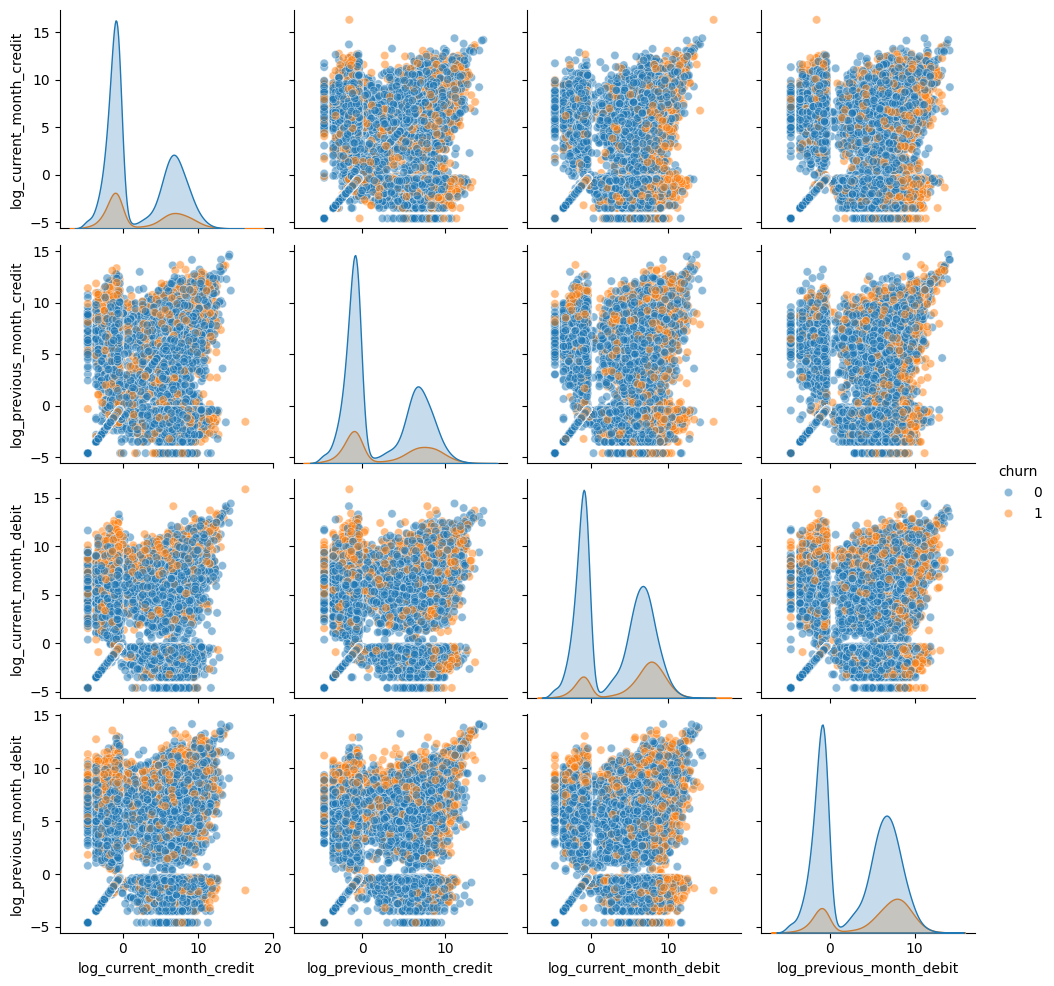

In [20]:
sns.pairplot(credit_debit_data, vars = deb_cre_cols, hue = 'churn', plot_kws={'alpha':0.5})
plt.show()

- Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
- Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. 
- For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature.